# Data cleaning - Traffic accident frequency based on weather conditions. 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

The first step to data cleaning is gathering your data. The readme files give you all the information and links to the websites where the datasets were obtained from.

In [47]:
# reading the csv
collisions_df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")
persons_df = pd.read_csv("Motor_Vehicle_Collisions_-_Person_20241111.csv")

You can uncheck the columns below as a form of data exploration. The columns below were used in the cleaning process, and added clutter to the main file hence they are commented out.

In [49]:
# collisions_df.head(5)
# rows, columns = collisions_df.shape
# print(f"Number of rows: {rows}, Number of columns: {columns}") Number of rows: 564824, Number of columns: 29

In [50]:
# persons_df.head(5)
# rows, columns = persons_df.shape
# print(f"Number of rows: {rows}, Number of columns: {columns}") Number of rows: 56532, Number of columns: 21

I filled all missing ages with -1 because I anticipated data loss from the restrictive merge conditions I planned to apply. My goal was to minimize any further data loss, so I assigned -1 to the missing age values. Further manipulation of the "age" column will be required in the future, but for now, -1 is used to avoid losing more data than necessary.

In [52]:
persons_df['PERSON_AGE'] = persons_df['PERSON_AGE'].fillna(-1)
persons_df['PERSON_AGE'] = persons_df['PERSON_AGE'].astype(int)

In [53]:
print("\nNull Values in Collisions Data:")
print(collisions_df.isnull().sum())
print("\nData Types in Collisions Data:")
print(collisions_df.dtypes)


Null Values in Collisions Data:
CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          198808
ZIP CODE                         198893
LATITUDE                          47354
LONGITUDE                         47354
LOCATION                          47354
ON STREET NAME                   137784
CROSS STREET NAME                289869
OFF STREET NAME                  427064
NUMBER OF PERSONS INJURED             1
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1         0
CONTRIBUTING FACTOR VEHICLE 2         0
CONTRIBUTING FACTOR VEHICLE 3    502885
CONTRIBUTING FACTOR VEHICLE 4    548937
CONTRIBUTING FACTOR VEHICLE 5    560156
COLLISION_ID                          0
VEHICLE

In [54]:
print("\nNull Values in Persons Data:")
print(persons_df.isnull().sum())
print("\nData Types in Persons Data:")
print(persons_df.dtypes)


Null Values in Persons Data:
UNIQUE_ID                    0
COLLISION_ID                 0
CRASH_DATE                   0
CRASH_TIME                   0
PERSON_ID                    0
PERSON_TYPE                  0
PERSON_INJURY                0
VEHICLE_ID               56532
PERSON_AGE                   0
EJECTION                 54164
EMOTIONAL_STATUS            12
BODILY_INJURY               10
POSITION_IN_VEHICLE      54013
SAFETY_EQUIPMENT         55682
PED_LOCATION                72
PED_ACTION                  93
COMPLAINT                    7
PED_ROLE                     0
CONTRIBUTING_FACTOR_1        0
CONTRIBUTING_FACTOR_2       68
PERSON_SEX                  66
dtype: int64

Data Types in Persons Data:
UNIQUE_ID                  int64
COLLISION_ID               int64
CRASH_DATE                object
CRASH_TIME                object
PERSON_ID                 object
PERSON_TYPE               object
PERSON_INJURY             object
VEHICLE_ID               float64
PERSON_AGE   

## Collisions Dataset
- convert crashdate and crashtime to datetime format in both person and crashes data.
- For the crash data, drop the following columns:
    - CONTRIBUTING FACTOR VEHICLE (2,3,4,5)
    - VEHICLE TYPE CODE (2,3,4,5)
    - OFF STREET NAME and CROSS STREE NAME
    - NUMBER OF PERSONS INJURED (1)
- fill longitude and latitude and with with median since the data run across the entire NY. Median will help avoid issues with extreme values (outliers).
- fill borough and zipcode fille with NA 

In [56]:
collisions_df['CRASH DATE'] = pd.to_datetime(collisions_df['CRASH DATE'])
collisions_df['CRASH TIME'] = pd.to_datetime(collisions_df['CRASH TIME'], format='%H:%M').dt.time


columns_to_drop = [
    'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 
    'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 
    'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
    'OFF STREET NAME', 'CROSS STREET NAME'
]
collisions_df.drop(columns=columns_to_drop, inplace=True)

In [57]:
collisions_df = collisions_df[collisions_df['NUMBER OF PERSONS INJURED'].notnull()]

In [58]:
collisions_df['BOROUGH'] = collisions_df['BOROUGH'].fillna('N/A')
collisions_df['ZIP CODE'] = collisions_df['ZIP CODE'].fillna('N/A')

In [59]:
collisions_df['ON STREET NAME'] = collisions_df['ON STREET NAME'].fillna('N/A')

In [60]:
collisions_df['VEHICLE TYPE CODE 1'] = collisions_df['VEHICLE TYPE CODE 1'].fillna('N/A')

In [61]:
# collisions_df['LOCATION'] = collisions_df['LOCATION'].fillna(collisions_df['LOCATION'].median()) This will give you a type error as you can't find the median of the strings in the location column.
collisions_df['LATITUDE'] = collisions_df['LATITUDE'].fillna(collisions_df['LATITUDE'].median())
collisions_df['LONGITUDE'] = collisions_df['LONGITUDE'].fillna(collisions_df['LONGITUDE'].median())

In [62]:
def fill_location(row):
    if pd.isna(row['LOCATION']) and pd.notna(row['LATITUDE']) and pd.notna(row['LONGITUDE']):
        return f"({row['LATITUDE']}, {row['LONGITUDE']})"
    else:
        return row['LOCATION']

collisions_df['LOCATION'] = collisions_df.apply(fill_location, axis=1)

In [63]:
collisions_df['NUMBER OF PERSONS INJURED'] = collisions_df['NUMBER OF PERSONS INJURED'].astype(int)

In [64]:
collisions_df.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1
0,2019-01-01,18:41:00,N/A,N/A,40.715992,-73.920490,"(40.715992, -73.92049)",VERRAZANO BRIDGE UPPER,0,0,0,0,0,0,0,0,Following Too Closely,4060800,Sedan
1,2019-01-01,00:20:00,QUEENS,11377.0,40.743137,-73.915855,"(40.743137, -73.915855)",ROOSEVELT AVENUE,0,0,0,0,0,0,0,0,Following Too Closely,4060563,Station Wagon/Sport Utility Vehicle
2,2019-01-01,03:30:00,QUEENS,11103.0,40.759020,-73.913450,"(40.75902, -73.91345)",N/A,1,0,0,0,0,0,1,0,Fatigued/Drowsy,4060689,Sedan
3,2019-01-01,12:00:00,N/A,N/A,40.878483,-73.861630,"(40.878483, -73.86163)",EAST 213 STREET,0,0,0,0,0,0,0,0,Unsafe Speed,4060655,Sedan
4,2019-01-01,02:30:00,BROOKLYN,11211.0,40.703434,-73.960350,"(40.703434, -73.96035)",WILLIAMSBURG STREET WEST,1,0,0,0,0,0,1,0,Following Too Closely,4060542,Sedan


## Persons Dataset
- convert crashdate and crashtime to datetime format in both person dataframe.
- For the crash data, drop the following columns:
    - 'UNIQUE_ID', 'PERSON_ID', "VEHICLE_ID","EJECTION","POSITION_IN_VEHICLE","SAFETY_EQUIPMENT","PED_LOCATION",
      "PED_ACTION","COMPLAINT","PED_ROLE","CONTRIBUTING_FACTOR_1","CONTRIBUTING_FACTOR_2","BODILY_INJURY", "EMOTIONAL_STATUS"
- remove the negative age columns (you cant use the median because there was 1668 -ve age columns, after changing the empty columns to -1). 
- fill empty sex columns with "unknown"

In [66]:
persons_df['CRASH_DATE'] = pd.to_datetime(persons_df['CRASH_DATE'])
persons_df['CRASH_TIME'] = pd.to_datetime(persons_df['CRASH_TIME'], format='%H:%M').dt.time

In [67]:
columns_to_drop_persons = [
    'UNIQUE_ID', 'PERSON_ID', "VEHICLE_ID","EJECTION","POSITION_IN_VEHICLE","SAFETY_EQUIPMENT","PED_LOCATION",
    "PED_ACTION","COMPLAINT","PED_ROLE","CONTRIBUTING_FACTOR_1","CONTRIBUTING_FACTOR_2","BODILY_INJURY", "EMOTIONAL_STATUS", "PERSON_INJURY", "PERSON_TYPE"
]
persons_df.drop(columns=columns_to_drop_persons, inplace=True)

### Different approach for the age column. Its alot of rows to drop so I decided to check the distribution. Since its is right skewed, I decided the median will be a better filler for the missing values
If left-skewed or right-skewed, fill the empty cells with Median
If normal distribution, then fill empty cells with mean.

Alternatively, use regression to predict the age (this is too extensive for this project).

**NOTE** This is a very dummy down and not appropriate method of determining how to deal with missing data. The steps above come with a lot of bias. This will be noted in the final document. Hence, this document is for training purposes and not to draw statiscal inference. 

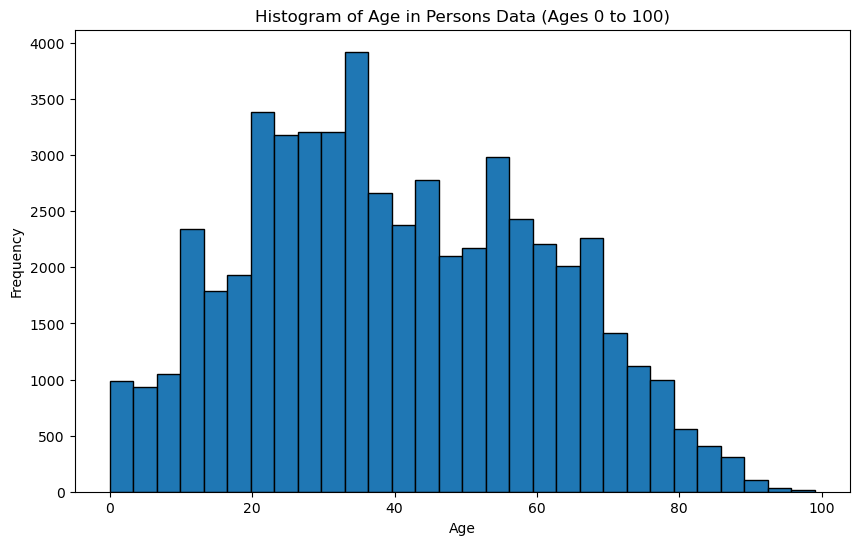

In [69]:
persons_df['PERSON_AGE'] = persons_df['PERSON_AGE'].astype(int)
filtered_ages = persons_df[(persons_df['PERSON_AGE'] >= 0) & (persons_df['PERSON_AGE'] <= 100)]['PERSON_AGE']

plt.figure(figsize=(10, 6))
plt.hist(filtered_ages, bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age in Persons Data (Ages 0 to 100)')
plt.show()

In [70]:
persons_df['PERSON_AGE'] = persons_df['PERSON_AGE'].fillna(persons_df['PERSON_AGE'].median())
persons_df['PERSON_SEX'] = persons_df['PERSON_SEX'].fillna('Unknown')

In [71]:
persons_df = persons_df[persons_df['PERSON_AGE'] >= 0]

In [72]:
persons_df.rename(columns={'CRASH_DATE': 'CRASH DATE', 'CRASH_TIME': 'CRASH TIME'}, inplace=True)

In [73]:
persons_df.head(5)

,COLLISION_ID,CRASH DATE,CRASH TIME,PERSON_AGE,PERSON_SEX
0,4055134,2018-12-31,07:50:00,41,F
1,4055452,2018-12-31,18:00:00,21,M
2,4055454,2018-12-31,17:35:00,17,F
3,4055461,2018-12-31,19:05:00,57,M
4,4055431,2018-12-31,16:48:00,22,M


In [74]:
# persons_df.head(5)Number of rows: 56532, Number of columns: 21 Total rows in merged DataFrame: 2230
rows, columns = persons_df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}") 

Number of rows: 54864, Number of columns: 5


## Merge Dataset
Performing an inner join to merge both dataframes.
Dont be worried about the drop in the number of rows, its inevitable. There is a lot of mismatch between the datasets so this is the only way to maintain a good quality data. In this context, I will say, less is more.
Even if you inner join, crash date and collision ID only, you will end up with the same number of rows.

In [76]:
df = pd.merge(
    collisions_df, persons_df,
    how='inner',
    left_on=['COLLISION_ID', 'CRASH DATE', 'CRASH TIME'],
    right_on=['COLLISION_ID', 'CRASH DATE', 'CRASH TIME']
)

In [77]:
print(f"Total rows in merged DataFrame: {df.shape[0]}") 

Total rows in merged DataFrame: 2230


In [78]:
#rounding teh crash time column but need to convert to datetime64[ns] to use the round function.
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M:%S')
df['CRASH TIME'] = df['CRASH TIME'].dt.round('h')
df['CRASH TIME'] = df['CRASH TIME'].dt.time

In [79]:
df.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,PERSON_AGE,PERSON_SEX
0,2019-01-02,16:00:00,MANHATTAN,10038.0,40.710580,-74.007385,"(40.71058, -74.007385)",ANN STREET,1,0,...,0,0,0,0,0,Passing or Lane Usage Improper,4061151,Taxi,60,M
1,2019-01-03,18:00:00,QUEENS,11433.0,40.704422,-73.792854,"(40.704422, -73.792854)",ARCHER AVENUE,1,0,...,0,0,0,0,0,Failure to Yield Right-of-Way,4061375,Station Wagon/Sport Utility Vehicle,60,F
2,2019-01-08,07:00:00,N/A,N/A,40.652855,-73.945915,"(40.652855, -73.945915)",EAST 34 STREET,1,0,...,0,0,0,0,0,Backing Unsafely,4063731,Station Wagon/Sport Utility Vehicle,42,F
3,2019-01-09,12:00:00,BROOKLYN,11216.0,40.669857,-73.950510,"(40.669857, -73.95051)",EASTERN PARKWAY,0,0,...,0,0,0,0,0,Driver Inattention/Distraction,4066070,Sedan,0,M
4,2019-01-12,16:00:00,N/A,N/A,40.602535,-73.993210,"(40.602535, -73.99321)",85 STREET,1,0,...,0,0,0,0,0,Following Too Closely,4065635,Pick-up Truck,35,F


### Weather Dataset
The weather data doesnt require as much cleaning as the other two datasets. The key steps taken here was removal of the first two three rows (you can do this manually) and renaming the temperatures column (you have to do this manually because of the degree sign). 

In [81]:
weather_df = pd.read_csv("open-meteo-2018inches.csv")
weather_df = weather_df.iloc[2:]

In [82]:
new_header = weather_df.iloc[0] 
weather_df = weather_df[1:] 
weather_df.columns = new_header 

In [83]:
# weather_df.head(5)

In [84]:
weather_df[['date', 'time']] = weather_df['time'].str.split('T', expand=True)

In [85]:
weather_df = weather_df.reset_index(drop=True)
weather_df = weather_df.rename_axis(None, axis=1)

In [86]:
weather_df.rename(columns={
    'precipitation (inch)': 'precipitation',
    'rain (inch)': 'rain',
    'snowfall (inch)': 'snowfall',
    'snow_depth (ft)': 'snow_depth'
}, inplace=True)

In [87]:
columns_to_float = ['temperature', 'precipitation', 'rain', 'snowfall', 'snow_depth']
for column in columns_to_float:
    weather_df[column] = weather_df[column].astype(float)

In [88]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['time'] = pd.to_datetime(weather_df['time'], format='%H:%M').dt.time

In [89]:
weather_df.head(5)

,time,temperature,precipitation,rain,snowfall,snow_depth,date
0,00:00:00,2.4,0.0,0.0,0.0,0.0,2018-12-31
1,01:00:00,1.2,0.0,0.0,0.0,0.0,2018-12-31
2,02:00:00,0.9,0.0,0.0,0.0,0.0,2018-12-31
3,03:00:00,0.5,0.0,0.0,0.0,0.0,2018-12-31
4,04:00:00,0.1,0.0,0.0,0.0,0.0,2018-12-31


### Merge Weather Data
The dimension of the final data reduced even further because we extracted data from 2018 - 2024 (day the extraction was done) with the intention of only using the data from 2019 to 2023, so that we have complete years.

In [91]:
final_df = pd.merge(
    df, weather_df,
    how='inner',
    left_on=['CRASH DATE', 'CRASH TIME'],
    right_on=['date', 'time']
)

In [92]:
final_df.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,VEHICLE TYPE CODE 1,PERSON_AGE,PERSON_SEX,time,temperature,precipitation,rain,snowfall,snow_depth,date
0,2019-01-02,16:00:00,MANHATTAN,10038.0,40.710580,-74.007385,"(40.71058, -74.007385)",ANN STREET,1,0,...,Taxi,60,M,16:00:00,2.6,0.0,0.0,0.0,0.0,2019-01-02
1,2019-01-03,18:00:00,QUEENS,11433.0,40.704422,-73.792854,"(40.704422, -73.792854)",ARCHER AVENUE,1,0,...,Station Wagon/Sport Utility Vehicle,60,F,18:00:00,6.9,0.0,0.0,0.0,0.0,2019-01-03
2,2019-01-08,07:00:00,N/A,N/A,40.652855,-73.945915,"(40.652855, -73.945915)",EAST 34 STREET,1,0,...,Station Wagon/Sport Utility Vehicle,42,F,07:00:00,0.9,0.0,0.0,0.0,0.0,2019-01-08
3,2019-01-09,12:00:00,BROOKLYN,11216.0,40.669857,-73.950510,"(40.669857, -73.95051)",EASTERN PARKWAY,0,0,...,Sedan,0,M,12:00:00,4.2,0.0,0.0,0.0,0.0,2019-01-09
4,2019-01-12,16:00:00,N/A,N/A,40.602535,-73.993210,"(40.602535, -73.99321)",85 STREET,1,0,...,Pick-up Truck,35,F,16:00:00,-1.8,0.0,0.0,0.0,0.0,2019-01-12


In [93]:
final_df.to_csv("main_dataset.csv", header=True)

## DEBUGGING

Enter any debugging code.

In [95]:
# print("Unique times in merged_df:", final_df['CRASH TIME'].unique())
# print("Unique times in weather_df:", weather_df['time'].unique())

In [96]:
# print("\nNull Values in Persons Data:")
# print(final_df.isnull().sum())

In [97]:
# final_df.shape[0]

In [98]:
# weather_df.dtypes

In [99]:
# df.dtypes